In [ ]:
import random
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [ ]:
np.random.seed(0)

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
X,y = make_blobs(n_samples = 5000,centers = [[4,4],[-2,-1],[2,-3],[1,1]], cluster_std = 0.9)

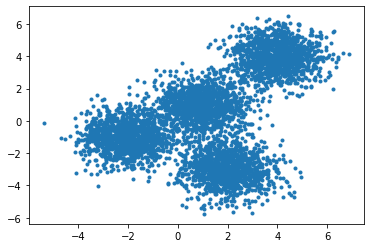

In [ ]:
plt.scatter(X[:,0],X[:,1],marker = '.')

In [ ]:
k_means = KMeans(n_clusters = 4,n_init = 12)

In [ ]:
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

In [ ]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0], dtype=int32)

In [ ]:
K_means_cluster_center = k_means.cluster_centers_

In [ ]:
K_means_cluster_center

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

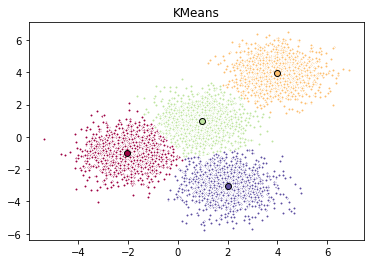

In [ ]:
#initializing the figure
fig = plt.figure(figsize = (6,4))

#creating an array of colours 
colors = plt.cm.Spectral(np.linspace(0,1,len(set(k_means_labels))))

#Create a plot 
ax = fig.add_subplot(1,1,1)


#looping through my clusters and their colours
for k, col in zip(range(len([[4,4],[-2,-1],[2,-3],[1,1]])),colors):

  #to check if the datap's belong to the cluster or not
  my_members = (k_means_labels == k)

  #Centroid
  cluster_center = K_means_cluster_center[k]

  #plotting the Dp's
  ax.plot(X[my_members,0],X[my_members,1],'w',markerfacecolor=col,marker = '.')
  
  #plotting the ccentroid
  ax.plot(cluster_center[0],cluster_center[1],'o',markerfacecolor=col,markeredgecolor = 'k',markersize =6)

ax.set_title("KMeans")
plt.show()

# Customer Segmentation with K-Means

In [ ]:
import os 
import pandas as pd

In [ ]:
cus_df = pd.read_csv("https://raw.githubusercontent.com/Laxminarayen/Inceptez-Batch-17/main/Day%2022%20Clustering/data/Cust_Segmentation.csv")

In [ ]:
cus_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [ ]:
df = cus_df.drop('Address',axis = 1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [ ]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataset = StandardScaler().fit_transform(X)
Clus_dataset

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

# Modelling

In [ ]:
clusterNum = 3 
k_means = KMeans(init = 'k-means++',n_clusters = clusterNum, n_init =12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 2 1 1 0 2 1 2 1 2 2 1 1 1 1 1 1 1 2 1 1 1 1 2 2 2 1 1 2 1 2 1 1 1 1 1 1
 1 1 2 1 2 1 0 1 2 1 1 1 2 2 1 1 2 2 1 1 1 2 1 2 1 2 2 1 1 2 1 1 1 2 2 2 1
 1 1 1 1 2 1 2 2 0 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 1 1 1 2 1 2 2 1 2 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 2 1
 1 1 1 1 2 1 1 2 1 2 1 1 2 0 1 2 1 1 1 1 1 1 0 2 1 1 1 1 2 1 1 2 2 1 2 1 2
 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 0 2 1 1 1 1 1 1 1 2 1 1 1 1
 1 1 2 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 2 1 2 2 1 1 1 1 1 1
 1 1 1 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 2 1 2 2 1
 1 1 1 1 2 1 1 1 1 1 1 2 1 1 2 1 1 2 1 1 1 1 1 2 1 1 1 0 1 1 1 2 1 2 2 2 1
 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 2 1 1 2 1 1 1 1 2 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 0
 1 1 1 1 1 1 2 1 1 1 0 1 1 1 1 2 1 0 1 1 1 1 2 1 2 2 2 1 1 2 2 1 1 1 1 1 1
 1 2 1 1 1 1 2 1 1 1 2 1 

In [ ]:
Nc = range(1,20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score  = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]


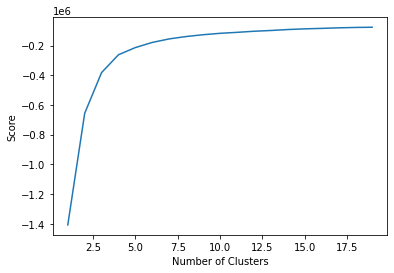

In [ ]:
plt.plot(Nc,score)
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


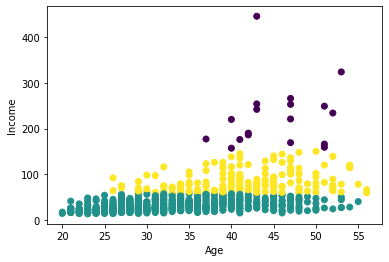

In [ ]:
plt.scatter(X[:,0],X[:,3], c = labels.astype(np.float))
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


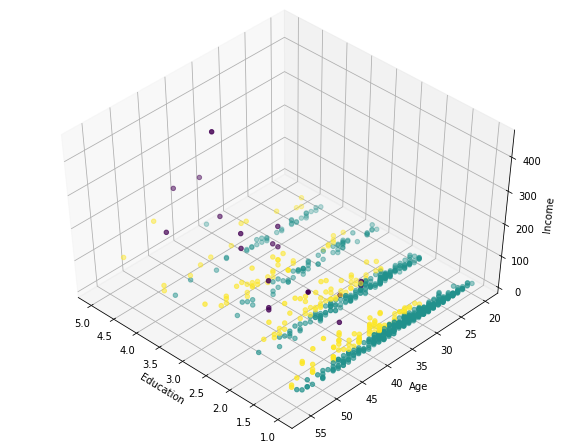

In [ ]:
fig = plt.figure(1,figsize=(8,6))
ax = Axes3D(fig,rect = [0,0,0.95,1],elev = 48,azim = 134)

plt.cla()
ax.set_xlabel("Education")
ax.set_ylabel("Age")
ax.set_zlabel("Income")
ax.scatter(X[:,1],X[:,0],X[:,3],c = labels.astype(np.float))

In [ ]:
1. Educated, Old 
2. Young and Low-income 
3, Middle aged and middle income